In [1]:
using StatsBase

In [58]:
Float32(0.0) ==0

true

In [2]:
buf = [[2,3,5], [1], [4,6,7,8,9,3, 2, 1, 1, 3]]

3-element Vector{Vector{Int64}}:
 [2, 3, 5]
 [1]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]

In [5]:
test = sample(buf, weights([length(a) for a in buf]), 8, replace=true)

8-element Vector{Vector{Int64}}:
 [2, 3, 5]
 [2, 3, 5]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]
 [1]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]
 [4, 6, 7, 8, 9, 3, 2, 1, 1, 3]

In [1]:
using LinearAlgebra
using Flux
using CUDA

In [2]:
using BSON: @save, @load

In [59]:
@load "/home/yoshihiro/Documents/Codes/julia/AlphaZeroForPhysics/AZP_valMAX_head21.bson" model0

In [5]:
function make_image(history::Vector{Int}, turn::Int)
    input_data = zeros(Int, 60, 1)
    for act_ind in 1:6
        ind = findall(x->x==act_ind, history[1:turn])
        for it in ind
            input_data[(act_ind-1)*10+it,1] = 1
        end
    end
    return input_data
    #append!(copy(agt.history[1:turn]), zeros(Int, env.max_turn-turn))
end

make_image (generic function with 1 method)

In [60]:
vp = []
input0 = zeros(Int, 60, 1)
y = model0(input0)
println(y)
push!(vp, y)

Float32[-1.5937207; 0.904075; -0.6864185; -0.80848545; -0.042422794; -1.2154071; 0.782193;;]


1-element Vector{Any}:
 Float32[-1.5937207; 0.904075; … ; -1.2154071; 0.782193;;]

In [62]:
input0 = make_image([3, 3], 1)
y = model0(input0)
println(y)
#push!(vp, y)

Float32[-1.703659; -0.61729234; 1.1616491; -1.5078244; -0.42510897; -1.8989457; -2.1731539;;]


In [2]:
CUDA.functional()

true

In [2]:
input = 4
middle = 16
output = 6
depth = 2

2

In [3]:
tanh10(x) = Float32(10)*tanh(x)
tanh2(x) = Float32(2)*tanh(x)

tanh2 (generic function with 1 method)

In [5]:
model_cpu = Chain(Dense(input, middle), Tuple(Chain(Parallel(+, Chain(BatchNorm(middle), Dense(middle, middle, relu)),Dense(middle, middle, relu)), identity) for i in 1:depth)..., Flux.flatten , Parallel(vcat,Chain(Dense(middle, middle, relu),Dense(middle, output)), Dense(middle, 1, tanh10)))
#model_gpu = gpu(model_cpu)

Chain(
  Dense(4 => 16),                       # 80 parameters
  Chain(
    Parallel(
      +,
      Chain(
        BatchNorm(16),                  # 32 parameters, plus 32
        Dense(16 => 16, relu),          # 272 parameters
      ),
      Dense(16 => 16, relu),            # 272 parameters
    ),
    identity,
  ),
  Chain(
    Parallel(
      +,
      Chain(
        BatchNorm(16),                  # 32 parameters, plus 32
        Dense(16 => 16, relu),          # 272 parameters
      ),
      Dense(16 => 16, relu),            # 272 parameters
    ),
    identity,
  ),
  Flux.flatten,
  Parallel(
    vcat,
    Chain(
      Dense(16 => 16, relu),            # 272 parameters
      Dense(16 => 6),                   # 102 parameters
    ),
    Dense(16 => 1, tanh10),             # 17 parameters
  ),
)         # Total: 20 trainable arrays, 1_623 parameters,
          # plus 4 non-trainable, 64 parameters, summarysize 8.605 KiB.

In [10]:
test = Dense(4, 6, relu)

Dense(4 => 6, relu)  # 30 parameters

In [11]:
test.weight

6×4 Matrix{Float32}:
 -0.433935    -0.477517   -0.523373  -0.564463
 -0.186125     0.343634    0.687627  -0.21954
  0.173528    -0.302567    0.45031   -0.207285
  0.36449     -0.614085   -0.771836   0.486023
 -0.00439922  -0.0769562   0.348954   0.692657
  0.0341693    0.649083   -0.104923  -0.0851435

In [56]:
input_cpu = rand(Float32, input, 100)
input_gpu = gpu(input_cpu)

60×100 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.0114042  0.18332    0.765516   0.213516   …  0.192538  0.161262   0.441974
 0.552777   0.527991   0.918638   0.66378       0.348115  0.550304   0.794597
 0.724218   0.274861   0.615445   0.282499      0.85024   0.38275    0.128529
 0.0950158  0.952007   0.822886   0.163181      0.552414  0.442852   0.181775
 0.918159   0.727206   0.068696   0.0375364     0.12477   0.426927   0.196977
 0.567396   0.559906   0.184195   0.231767   …  0.782175  0.225234   0.354886
 0.312535   0.590902   0.542269   0.722829      0.506676  0.679475   0.632774
 0.685422   0.347013   0.386121   0.299953      0.48325   0.615581   0.584196
 0.675649   0.514681   0.516023   0.704495      0.627904  0.883244   0.233842
 0.884922   0.346238   0.83194    0.806842      0.704898  0.235724   0.396564
 ⋮                                           ⋱                       
 0.291204   0.525684   0.169917   0.642695      0.19706   0.489911   0.413687
 0.475638   0.952229 

In [8]:
using BenchmarkTools

In [18]:
@benchmark model_cpu(input_cpu)

BenchmarkTools.Trial: 821 samples with 1 evaluation.
 Range (min … max):  5.325 ms … 17.850 ms  ┊ GC (min … max): 0.00% …  0.00%
 Time  (median):     5.514 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.086 ms ±  1.190 ms  ┊ GC (mean ± σ):  8.66% ± 12.39%

    ▁█                                                        
  ▅▅██▇▄▃▄▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▄▄▅▄▃▂▂▂▂ ▂
  5.33 ms        Histogram: frequency by time         8.2 ms <

 Memory estimate: 9.84 MiB, allocs estimate: 397.

In [19]:
@benchmark model_gpu(input_gpu)

BenchmarkTools.Trial: 3660 samples with 1 evaluation.
 Range (min … max):  1.159 ms … 71.857 ms  ┊ GC (min … max): 0.00% … 22.89%
 Time  (median):     1.225 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.363 ms ±  3.004 ms  ┊ GC (mean ± σ):  2.15% ±  0.96%

                ▃▃▄▆▆▇████▇▆▆▅▄▂▂▁▁        ▁ ▂▁ ▁ ▁  ▁       ▂
  ▅▆▄▅▅▅▄▄▁▅▄▁█▇█████████████████████▇▆██████████████████▇██ █
  1.16 ms      Histogram: log(frequency) by time     1.33 ms <

 Memory estimate: 91.80 KiB, allocs estimate: 2698.

In [9]:
target_cpu = rand(Float32, output+1, 100)
target_gpu = gpu(target_cpu)

7×100 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.359691  0.827861  0.701015  0.0665835  …  0.430494   0.538827  0.397607
 0.144383  0.757298  0.606553  0.591512      0.150765   0.453557  0.250389
 0.770996  0.658152  0.599976  0.923198      0.0534677  0.257332  0.220998
 0.430496  0.556138  0.929259  0.961789      0.423929   0.95815   0.509097
 0.977082  0.421876  0.229244  0.907603      0.689717   0.650201  0.0997217
 0.264095  0.874885  0.705193  0.989678   …  0.924571   0.333843  0.218859
 0.837614  0.927003  0.470668  0.370263      0.701419   0.907804  0.148546

In [28]:
@benchmark target_gpu = gpu(target_cpu)

BenchmarkTools.Trial: 10000 samples with 6 evaluations.
 Range (min … max):  5.728 μs … 329.608 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.360 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.350 μs ±  15.308 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

                       ▄██▅▁                                   
  ▂▁▂▂▂▂▂▂▁▁▂▁▁▂▂▂▂▂▃▄██████▇▅▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  5.73 μs         Histogram: frequency by time        7.32 μs <

 Memory estimate: 608 bytes, allocs estimate: 10.

In [10]:
training_step=800

800

In [12]:
opt=ADAM()

Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [51]:
loss(m::Chain, x, y, z) = sum((y .- m(x)).^2) + z^2

loss (generic function with 3 methods)

In [27]:
loss2(x, y, z) = sum((y .- x).^2) + z^2

loss2 (generic function with 1 method)

In [58]:
l = 0.0
@time for it in 1:training_step
    #Flux.train!(loss, Flux.params(model_cpu), [(model_cpu, input_cpu, target_cpu, Float32(0.2))], opt)
    
    val, grads = Flux.withgradient(Flux.params(model_cpu)) do
        loss(model_cpu, input_cpu, target_cpu,Float32(0.2))
        #loss(model_cpu(input_cpu),target_cpu,Float32(0.2))
    end
    Flux.Optimise.update!(opt, Flux.params(model_cpu), grads)
    l += val/100/training_step
end

 45.769847 seconds (9.07 M allocations: 37.986 GiB, 4.46% gc time)


In [62]:
opt=ADAM()

Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [50]:
function loss3(m::Chain, x::CuArray{Float32, 2}, y, z)
    x2 = cpu(m(x))
    return sum((y .- x2).^2) + z^2
end

loss3 (generic function with 2 methods)

In [64]:
sum(model_gpu(input_gpu))

315.3853f0

In [63]:
@time for it in 1:training_step
    Flux.train!(loss3, Flux.params(model_gpu), [(model_gpu, input_gpu, target_cpu, Float32(0.2))], opt)
end

  7.666558 seconds (24.52 M allocations: 1.801 GiB, 4.31% gc time)


In [1]:
using Plots

In [2]:
using LinearAlgebra

In [3]:
y = zeros(Float64, 10, 100)
for it in 1:10
    y[it,:] = [sin(it*x) for x in 0.02pi:0.02pi:2pi]
end

In [9]:
using ColorSchemes

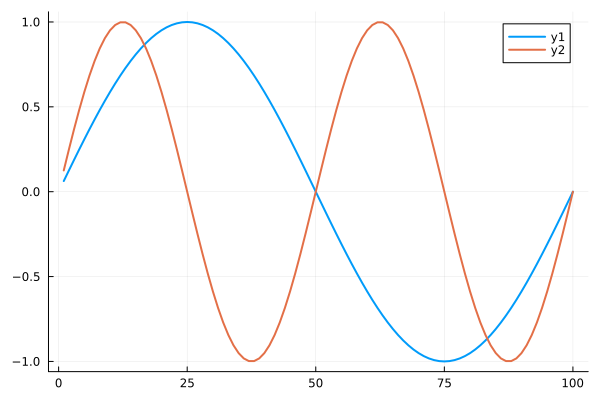

In [12]:
plot(y[1,:], linewidth=2.0, pallete=:acton, c=1)
plot!(y[2,:], linewidth=2.0, pallete=:acton)